In [130]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
import mtdnetwork.network as network
import mtdnetwork.hacker as hacker
from mtdnetwork.actions import ActionManager
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

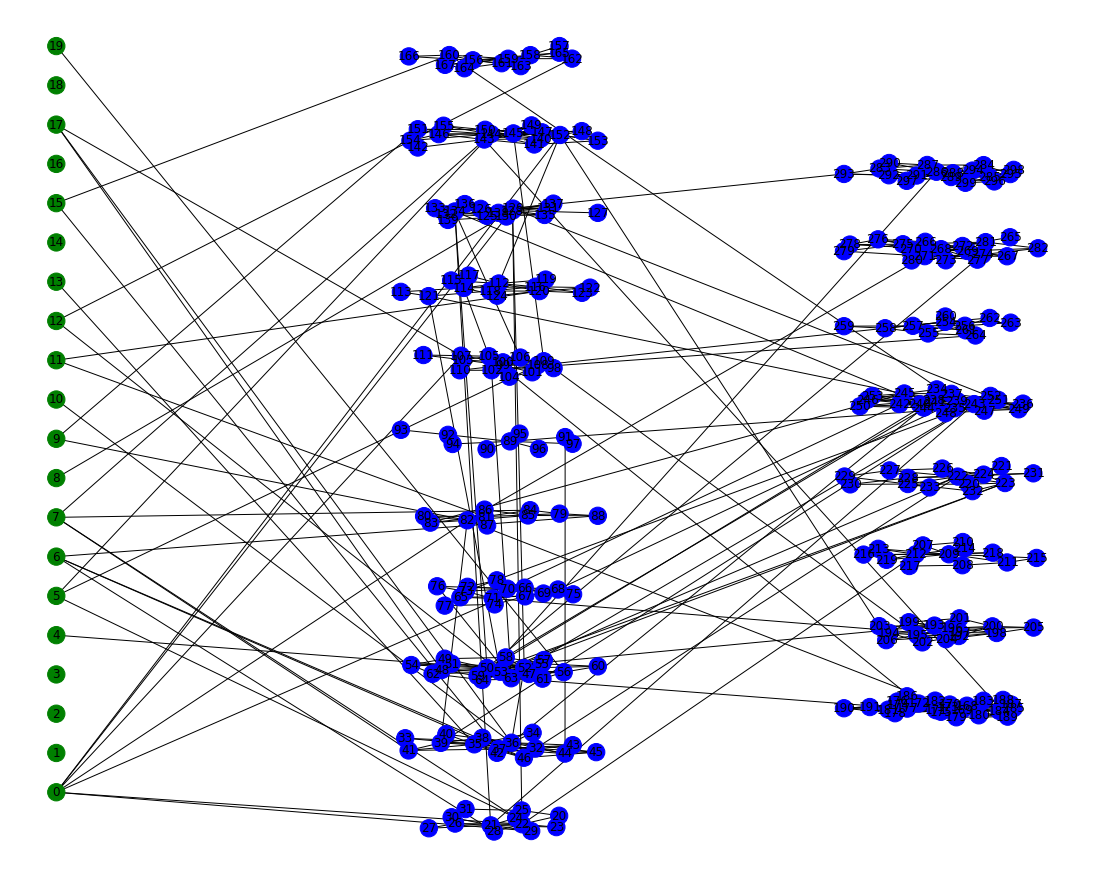

In [154]:
test_network = network.Network(300, 20, 20, 3)
action_manager = test_network.get_action_manager()
test_network.draw()

In [155]:
hacker = hacker.Hacker(test_network)

In [156]:
curr_time = 0
time_step = 1
for curr_time in range(200000):
    test_network.step(curr_time)
    hacker.step(curr_time)
    if hacker.done:
        break
    
print("DONE")
print("TIME:", curr_time)

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-3404e156-5223-49bf-aded-c86e6d653ae4:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:14:ubuntu:16.04
INFO:vuln-b53beab3-3800-49bc-860d-afe9765c2b93:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:15:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:19:centos:7
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:37:ubuntu:18.04
INFO:vuln-6e645695-11c4-4fb9-ad4d-96d9d22863ac:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:36:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:38:ubuntu:16.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:39:windows:xp
INFO:mtdnetwork.hacker:VULN COMPROMISE:243:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:239:centos:7
INFO:mtdnetwork.hacker:VULN COMPROMISE:242:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:245:centos:8
INFO:vuln

DONE
TIME: 199999


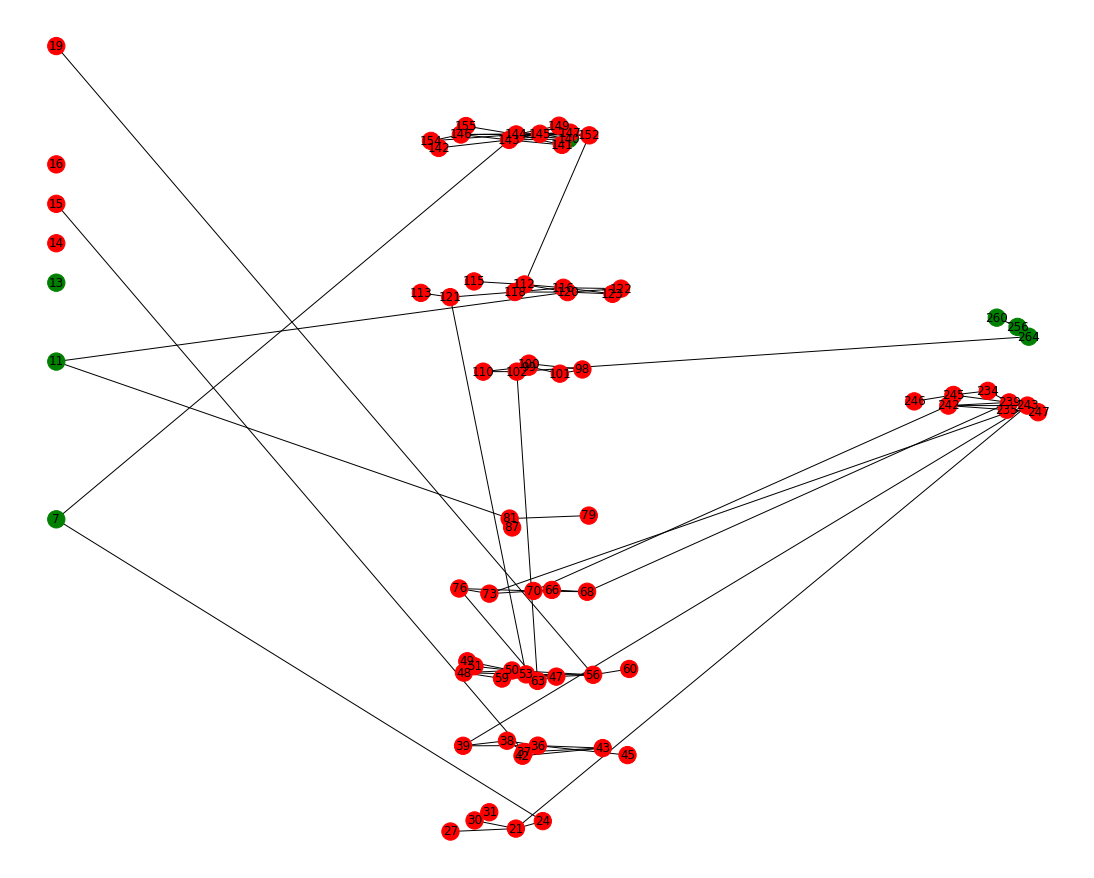

In [157]:
test_network.draw_compromised(hacker.compromised_hosts)

In [158]:
hacker.get_statistics()

{'Total Host Compromises': 75,
 'Total User Compromises': 88,
 'Total Vuln Compromises': 52,
 'Total Reuse Pass Compromises': 19,
 'Total Password Spray Compromises': 4,
 'Total Actions Blocked by MTD': 0}